In [3]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Based on the guidance from 
#("Reinforcement Learning Applied to the Mountain Car Problem" 2022)
#https://towardsdatascience.com/reinforcement-learning-applied-to-the-mountain-car-problem-1c4fb16729ba

In [4]:
#Implement the cart pole environment
env = gym.make("MountainCar-v0")

In [5]:
#Printing the Action space and obersation space
print("Number of action:",env.action_space)
print("Number of state for taxi:",env.observation_space)

Number of action: Discrete(3)
Number of state for taxi: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [6]:
#Break the space into discrete buckets
bucket_number = 20
discrete_bucket = [bucket_number,bucket_number]

each_bucket_size = (env.observation_space.high-env.observation_space.low)/discrete_bucket

#Two elements we need to need know about are postion and velocity and they are stored in each bucket.
print(each_bucket_size)

[0.09  0.007]


In [7]:

# This is a function to convert a continuos state in to a discreete state using the method above.
def discrete_state(continuous_state):
    discretestate = (continuous_state - env.observation_space.low)//each_bucket_size
    return tuple(discretestate.astype(int))
print(discrete_state(env.reset()))

(7, 10)


In [8]:
#Here I create a q table containing position velcoity and the action
Qtable = np.zeros(discrete_bucket + [env.action_space.n])

#Check for the shape of Q-table
print(Qtable.shape)

#Create a policy to take action with teh highest value in Q table.
def policy(state):
    return np.argmax(Qtable[state])

(20, 20, 3)


In [9]:
#Hyperparameter
alpha = 0.1    
gamma = 0.9    

In [10]:
#Array to store Max Position
max_position_array = []

#Running 10000 training episode
for i in range(20000):
    # Separate continuous state to discrete value
    state = discrete_state(env.reset())
    done = False
    max_position = -1
    
    #Create a loop while done is true
    while (done != True):    
        
        #check the policy method for the best action to take.
        best_action = policy(state)
        obs, reward, done, _ = env.step(best_action)
        #Update max position after every action
        if (obs[0]>max_position):
            max_position = obs[0]
        if (done == True):
            if (obs[0] > 0.5):
                max_position_array.append(0.5)
            else:
                max_position_array.append(max_position)
                
        #Problem is not resolved.
        else:
            #Convert contionous to discrete
            newstate = discrete_state(obs)

            #Update Q value
            oldvalue = Qtable[state+(best_action,)]
            newQvalue = (1-alpha)*oldvalue + alpha*( reward + gamma*np.max(Qtable[newstate]))
            Qtable[state+(best_action,)] = newQvalue

            #Update current state for next action is the new state
            state = newstate

print("Done training")

Done training


Text(0, 0.5, 'Maximum position')

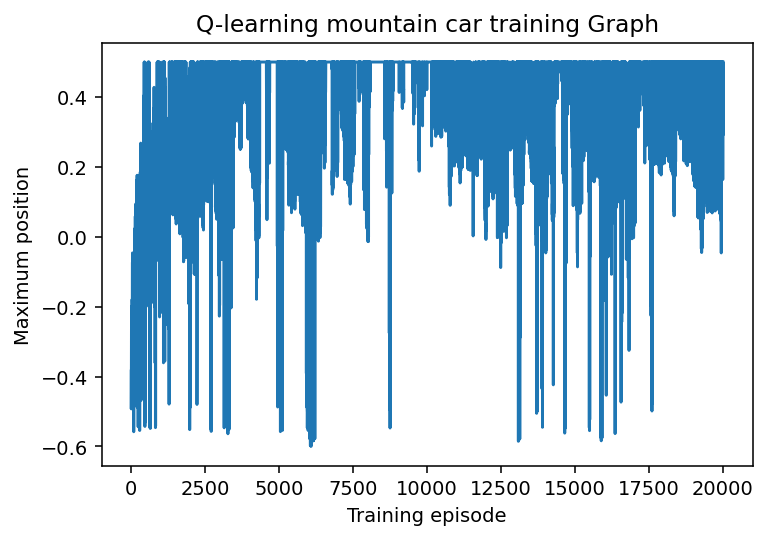

In [11]:
#Training episodes number from 1 to 20000
x = []
for i in range (1,20001):
    x.append(i)
    
#Result of training
y = max_position_array

#Graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=140)
ax.plot(x, y)

#Name the elements
ax.set_title('Q-learning mountain car training Graph')
ax.set_xlabel('Training episode')
ax.set_ylabel('Maximum position')



Text(0, 0.5, 'Maximum position')

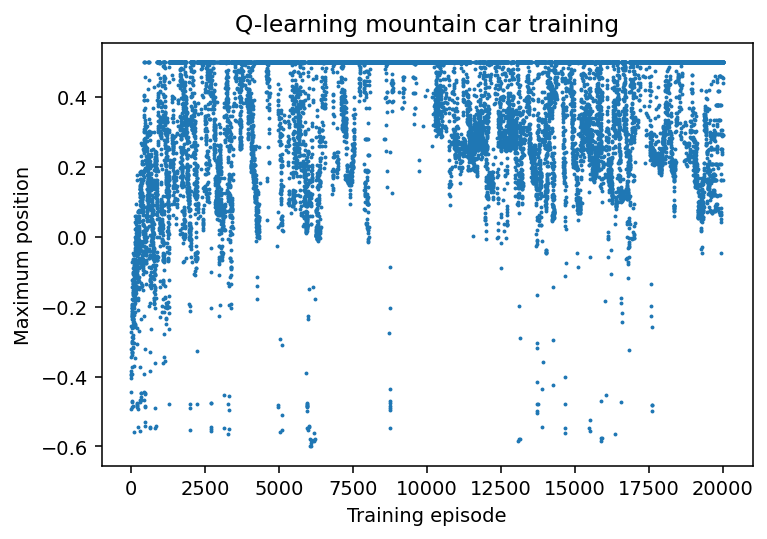

In [12]:
#Scatter for a better observation of the Q-learning method performance
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=140)
plt.scatter(x, y,1)

#Name the elements
plt.title('Q-learning mountain car training')
plt.xlabel('Training episode')
plt.ylabel('Maximum position')

In [13]:
Qtable = np.zeros(discrete_bucket + [env.action_space.n])

In [14]:
#Create array to store the maximum position the car could get for each episode for training evaluation later:
maxpos_array = []

#Running 10000 training episode
for i in range(10000):
    
    # Separate continuous state to discrete value
    state = discrete_state(env.reset())

    #Set done = False
    done = False
    
    #Create variables to store maximum position for each episode could reach:
    maxpos = -1
    
    #Create an loop until the episode is solved
    while (done!= True):    
        #Pull action based on policy
        action = policy(state)
        
        #Take output from action
        obs, rw, done, _ = env.step(action)
        
        #Update max position after every action
        if (obs[0]>maxpos):
            maxpos = obs[0]
               
        #Convert new observation state into discrete, initialize new action based on the same policy
        newstate = discrete_state(obs)
        next_action = policy(newstate)
        
        #Update new Qvalue for an action in the state space using the TD(0) Learning formula:
            
        oldvalue = Qtable[state+(action,)]
        newQvalue = oldvalue + alpha*(rw + gamma*Qtable[newstate+(next_action,)] - oldvalue)
        Qtable[state+(action,)] = newQvalue

        #Update current state for next action is the new state
        state = newstate
    maxpos_array.append(maxpos)

print("Done training")

Done training


Text(0, 0.5, 'Maximum position')

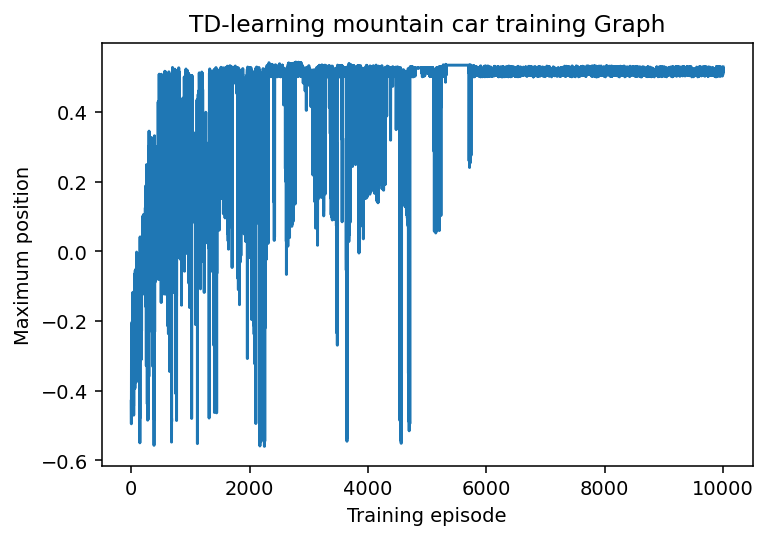

In [15]:
#Create variable x to store training episodes number from 1 to 10000
x = []
for i in range (1,10001):
    x.append(i)
    
#y is the result of episode of training in TD(0) method
y = maxpos_array

#Graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=140)
ax.plot(x, y)

#Name the elements
ax.set_title('TD-learning mountain car training Graph')
ax.set_xlabel('Training episode')
ax.set_ylabel('Maximum position')


Text(0, 0.5, 'Maximum position')

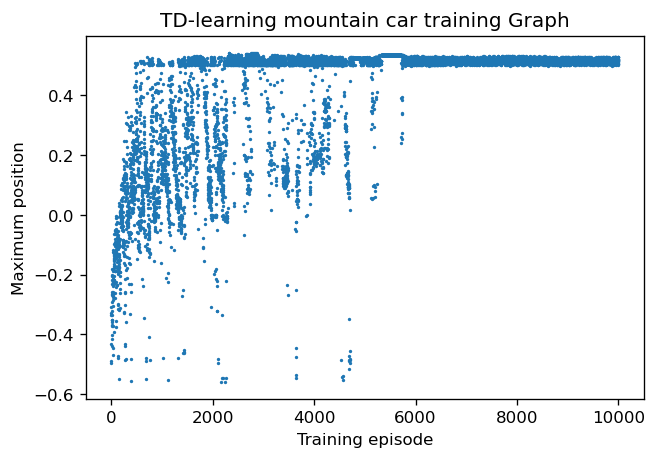

In [16]:
#Scatter for a better observation of the TD(0)-learning method performance
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x, y,1)

#Name the elements
plt.title('TD-learning mountain car training Graph')
plt.xlabel('Training episode')
plt.ylabel('Maximum position')